In [1]:
#importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
%matplotlib inline

In [2]:
from keras.datasets import cifar10 #importing cifar10 dataset from kerar

## Load the dataset

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data() #loading the dataset

170498071/170498071 [==============================] - 6s 0us/step


##preprocessing



In [4]:
print('Training data shape : ', X_train.shape, Y_train.shape) #checking the shapes of training data

Training data shape :  (50000, 32, 32, 3) (50000, 1)


In [5]:
print('Testing data shape : ', X_test.shape, Y_test.shape) #checking shapes of the testing data

Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [6]:
#checking the number of classes and showing them
classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [8]')

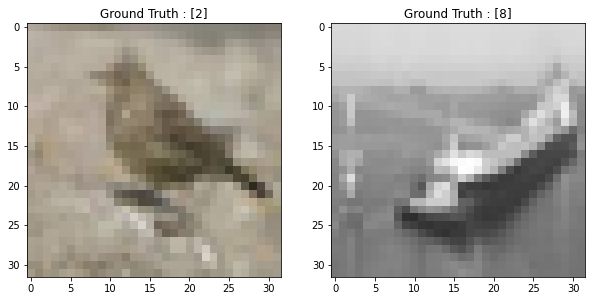

In [7]:
data_point=120
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[data_point,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[data_point]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[data_point,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[data_point]))

In [8]:
#Reshaping X_train data

X_train_reshaped=np.reshape(X_train,(50000, 32, 32, 3))


In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
#Reshaping X_text data
X_test_reshaped=np.reshape(X_test,(10000, 32, 32, 3))

In [11]:
X_train[0] #viewing X_train data

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
np.max(X_train[0]) #looking for the maximum value in X_train

255

In [13]:
#Normalizing X_train and X_test data
X_train = X_train / 255
X_test = X_test / 255

In [14]:
#splitting X_train and Y_train to have validation data
X_train, X_val, Y_train, Y_val=train_test_split(X_train, Y_train, test_size=0.3) 

In [15]:
#perfoming One_hot ecoding 
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
num_classes = 10

## convolutional neural network



In [16]:
def baseline_model():
    # create model
    model = Sequential()
    
    # Since this is the first layer, we need to specify the input shape. Only here, only once.
    # We are creating 64 filters each of size 2x2. What will be the depth of each of those 64 filters?
    # What will be the resulting depth of the feature map after applying these filters?

    # "valid" means no padding. "same" results in padding with zeros evenly to the 
    # left/right or up/down of the input such that output has the same height/width dimension as the input. 
    model.add(Conv2D(filters=64, kernel_size=2, activation='relu', input_shape=(32,32,3))) 
    
    # Here we create a 2x2 max pooling layer
    model.add(MaxPool2D(pool_size=2))

    model.add(Conv2D(filters=110, kernel_size=2, padding='same', activation='relu')) 
    model.add(MaxPool2D(pool_size=2))
    model.add(Conv2D(filters=110, kernel_size=2, padding='same', activation='relu')) 
    model.add(MaxPool2D(pool_size=2))

    # In order to pass output from the convolutional block to the dense block, we must flatten each example in the minibatch. 
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))

    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))

    loss = CategoricalCrossentropy()
    
    # Compile the model
    model.compile(loss=loss,
             optimizer='adam',
             metrics=['accuracy'])
    return model

In [17]:
model = baseline_model()

## Number of trainable parameters

In [18]:
model.summary() #model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 110)       28270     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 110)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 110)         48510     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 110)        0

In [19]:
#saving weights in the created folder
checkpoint_path = "training/cp-{epoch:04d}.ckpt"

cp_callback = ModelCheckpoint(filepath=checkpoint_path, 
                              save_best_only=True, 
                              save_weights_only=True, 
                              verbose=1)

## Training the model


In [20]:
#Training the model
history= model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=256, verbose=1, callbacks=[cp_callback])

history

Epoch 1/15
110/110 [==============================] - ETA: 0s - loss: 1.8589 - accuracy: 0.3204
Epoch 1: val_loss improved from inf to 1.50682, saving model to training/cp-0001.ckpt
110/110 [==============================] - 14s 29ms/step - loss: 1.8589 - accuracy: 0.3204 - val_loss: 1.5068 - val_accuracy: 0.4487
Epoch 2/15
109/110 [============================>.] - ETA: 0s - loss: 1.4611 - accuracy: 0.4688
Epoch 2: val_loss improved from 1.50682 to 1.34452, saving model to training/cp-0002.ckpt
110/110 [==============================] - 2s 19ms/step - loss: 1.4610 - accuracy: 0.4691 - val_loss: 1.3445 - val_accuracy: 0.5264
Epoch 3/15
109/110 [============================>.] - ETA: 0s - loss: 1.3214 - accuracy: 0.5273
Epoch 3: val_loss improved from 1.34452 to 1.19842, saving model to training/cp-0003.ckpt
110/110 [==============================] - 2s 20ms/step - loss: 1.3204 - accuracy: 0.5277 - val_loss: 1.1984 - val_accuracy: 0.5677
Epoch 4/15
110/110 [=============================

In [21]:
correct_values = np.argmax(Y_test,axis=1)

In [22]:
# New random initialisation
model = baseline_model()

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)

accuracy_score(predictions,correct_values)*100 #accuracy of the predictions

313/313 [==============================] - 1s 2ms/step


13.530000000000001

## performance

Plot the training and validation accuracy in a single plot

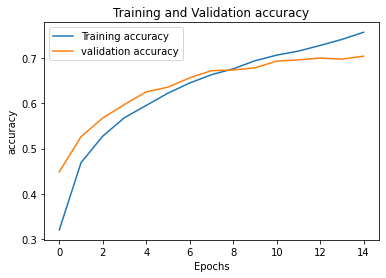

In [23]:
#plotting the perfomance in all the epochs
train_accuracy = history.history['accuracy']
Val_accuracy = history.history['val_accuracy']
epochs = range(0,15)
plt.plot( epochs, train_accuracy, label='Training accuracy')
plt.plot(epochs, Val_accuracy, label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Predicting on the test data

In [24]:
#predicting on first 10 inputs
model.predict(np.expand_dims(X_test[0], axis=0)) 

1/1 [==============================] - 0s 49ms/step


array([[0.1061362 , 0.09734968, 0.0869873 , 0.09836262, 0.09604689,
        0.10525039, 0.10225845, 0.10169587, 0.11277351, 0.09313902]],
      dtype=float32)

## Computing the accuracy



In [25]:
# Load a trained model from the 14th checkpoint
model = baseline_model()
model.load_weights("training/cp-0014.ckpt")

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)

accuracy_score(predictions,correct_values)*100 #checking its accuracy

NotFoundError: ignored

## confusion matrix

In [ ]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)


In [ ]:
predictions[0:10]

In [ ]:
confusion_matrix(predictions,correct_values) #obtaining a confusion matrix